In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
# Import csv with crime and income data
crime_income_df = pd.read_csv('income_crime.csv')
crime_income_df

,Unnamed: 0,city,state,20th,40th,Median,60th,80th,95th,murders,...,burglaries,burglariesper100k,thefts,theftsper100k,autothefts,autotheftsper100k,arson,arsonper100k,crime index,income inequality
0,0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359,0.0,...,44.0,132.3,462.0,1389.3,21.0,63.2,NaN,NaN,115.9,143781
1,1,Albertville,Alabama,17270,27280,32042,43119,73798,128375,0.0,...,145.0,671.7,413.0,1913.1,90.0,416.9,NaN,NaN,200.0,111105
2,2,Anniston,Alabama,12553,22337,30539,39541,65472,143838,14.0,...,542.0,2468.7,700.0,3188.3,110.0,501.0,NaN,NaN,1302.8,131285
3,3,Athens,Alabama,16777,33804,45920,57566,104817,199193,1.0,...,86.0,330.7,597.0,2295.8,12.0,46.1,NaN,NaN,140.2,182416
4,4,Auburn,Alabama,10718,26433,38912,53137,106853,198103,4.0,...,156.0,240.6,1454.0,2242.8,101.0,155.8,NaN,NaN,217.4,187385
5,5,Bessemer,Alabama,12497,24200,30682,39724,68488,115894,10.0,...,495.0,1877.8,1867.0,7082.7,219.0,830.8,NaN,NaN,1247.9,103397
6,6,Birmingham,Alabama,12217,24676,32404,41532,68837,125611,79.0,...,3146.0,1481.9,8838.0,4163.2,1515.0,713.6,145.0,68.3,841.0,113394
7,7,Cullman,Alabama,15091,33146,40129,49040,80061,131531,1.0,...,70.0,448.3,505.0,3234.5,39.0,249.8,NaN,NaN,251.8,116440
8,8,Daphne,Alabama,24224,48136,61508,76649,118944,203269,0.0,...,74.0,277.5,464.0,1739.8,18.0,67.5,NaN,NaN,125.5,179045
9,9,Decatur,Alabama,16869,32375,42602,54318,88674,154311,9.0,...,431.0,784.2,1680.0,3056.9,173.0,314.8,NaN,NaN,335.7,137442


In [3]:
# Drop the Unnamed column which is the same as the index values
crime_income_df = crime_income_df.drop(['Unnamed: 0'], axis = 1)

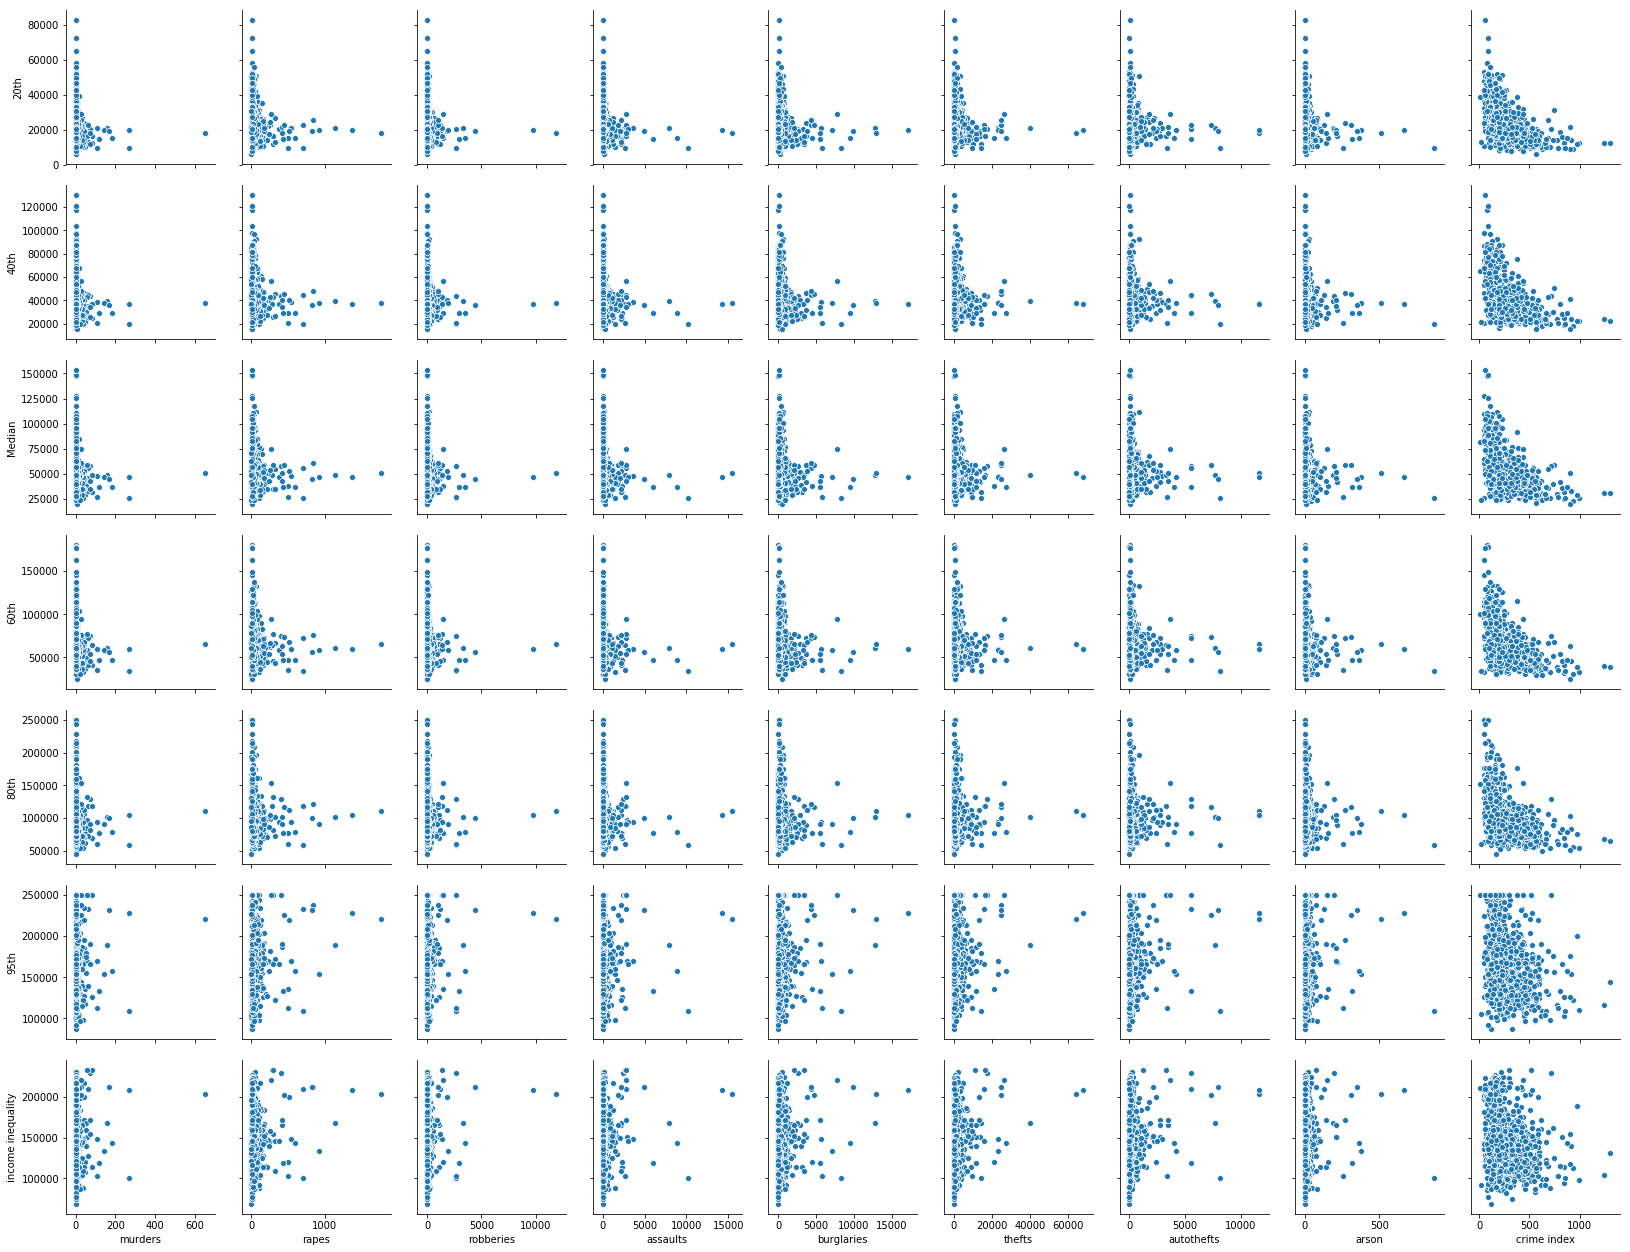

In [4]:
#list(crime_income_df)
# Create a pair plot with income columns and total numbers for crime
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', '60th', '80th', '95th', 'income inequality'],
             x_vars = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'thefts', 'autothefts', 'arson', 'crime index'])

Upon visual speculation, there appears to be a higher density of crime in general in areas where income at the 20th, 40th, 60th, and 80th percentile are lower. Meanwhile, when we take a look at the 95th percentile for income, areas with higher 95th percentile incomes appear to experience more murders, rapes, robberies, burglaries, thefts. Inspecting income ineqality on crime, we can see that there appears to be a higher density of crime in areas with higher income inequality, which we suspected. Rapes, assaults, autothefts, and arson have a bit more scatter, but they still appear to have an overall trend of increasing as income inequality increases. Arson may possibly have an outlier with the point indicating the highest number of arsons at a relatively lower income inequality.

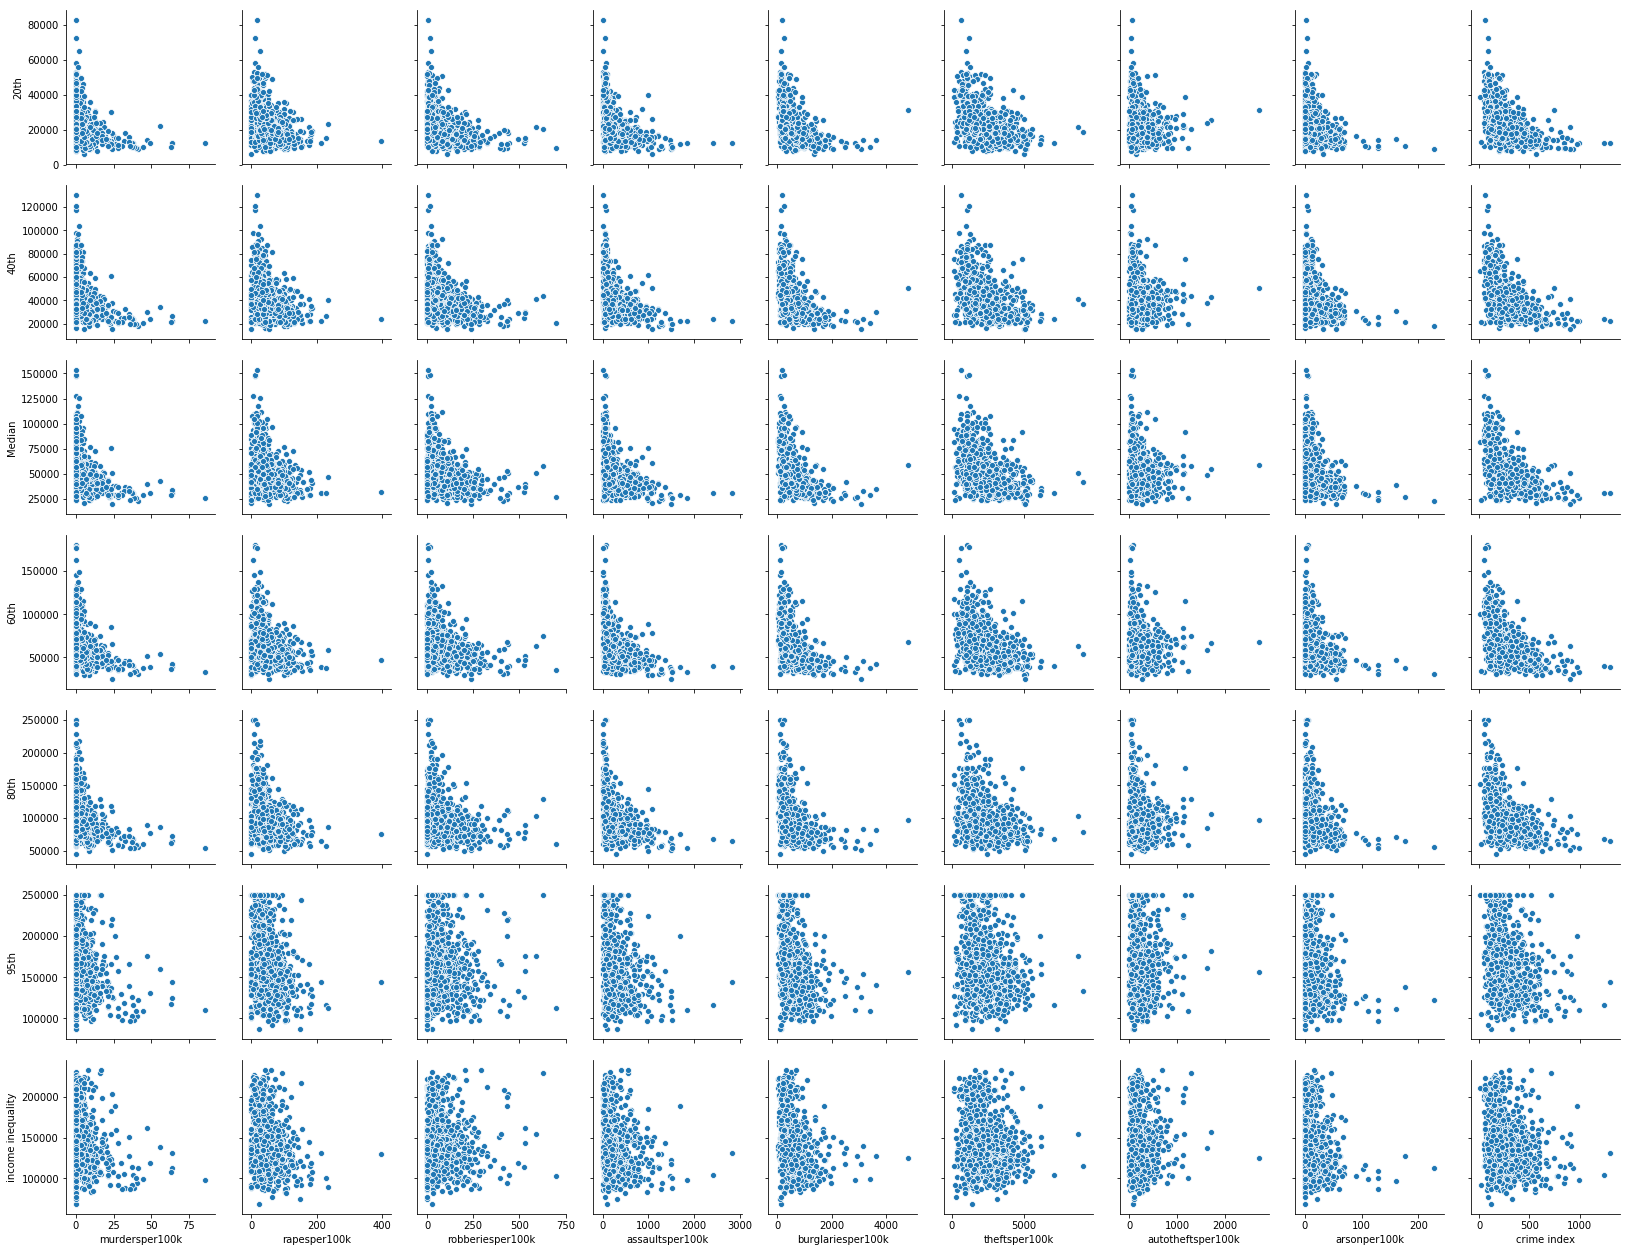

In [5]:
# Create a pair plot with income columns and crime per 100,000 based on population
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', '60th', '80th', '95th', 'income inequality'],
             x_vars = ['murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k', 'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index'])

When we try to visually compare income to crime per 100,000 in the population, there still appears to be higher density of crimes per 100k in areas where income at the 20th through 80th percentile are lower. At 95th percentile income, crimes per 100k appear more spread out, but still more concentrated at the lower income end for murders, assaults, burglaries, and arsons. Surprisingly, in comparison to how we saw that the density of crime appeared higher in areas of higher income inequality, our scatter plots almost seem to show that if there is any association at all, all sorts of crimes per 100k of the population appear in higher amounts in areas with lower income inequality. In comparison to the previous scatter plots, this might mean that although more counts of crime appear in areas of higher income inequality, those same places may be much more highly populated, so there are less crimes per 100k of the population in those areas.

In [6]:
# Get general statistics for income and crime data
(crime_income_df.describe()).round()

,20th,40th,Median,60th,80th,95th,murders,murdersper100k,rapes,rapesper100k,...,burglaries,burglariesper100k,thefts,theftsper100k,autothefts,autotheftsper100k,arson,arsonper100k,crime index,income inequality
count,924.0,924.0,924.0,924.0,924.0,924.0,924.0,924.0,912.0,912.0,...,920.0,920.0,922.0,922.0,923.0,923.0,866.0,866.0,924.0,924.0
mean,22906.0,41615.0,52190.0,64373.0,99164.0,166271.0,6.0,5.0,42.0,50.0,...,446.0,553.0,1772.0,2257.0,275.0,232.0,15.0,15.0,274.0,143365.0
std,9625.0,15647.0,18687.0,21774.0,30441.0,40941.0,29.0,8.0,118.0,37.0,...,1207.0,464.0,4456.0,1154.0,915.0,221.0,54.0,20.0,165.0,34556.0
min,5800.0,14972.0,19810.0,24911.0,44900.0,87338.0,0.0,0.0,0.0,0.0,...,1.0,30.0,7.0,140.0,0.0,0.0,0.0,0.0,12.0,68478.0
25%,16321.0,31220.0,39952.0,50241.0,79207.0,135346.0,0.0,0.0,5.0,23.0,...,59.0,250.0,322.0,1412.0,18.0,93.0,1.0,3.0,155.0,117151.0
50%,20567.0,37912.0,48156.0,59792.0,92406.0,157230.0,1.0,2.0,13.0,42.0,...,143.0,423.0,698.0,2083.0,51.0,168.0,3.0,10.0,236.0,136314.0
75%,27436.0,48671.0,60354.0,73607.0,110632.0,189094.0,3.0,7.0,35.0,68.0,...,356.0,703.0,1621.0,2938.0,166.0,294.0,10.0,20.0,352.0,163504.0
max,82565.0,130119.0,153253.0,180125.0,250001.0,250001.0,653.0,86.0,1762.0,396.0,...,17108.0,4809.0,67828.0,9071.0,11596.0,2702.0,869.0,228.0,1303.0,233753.0


c:\users\puistori\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


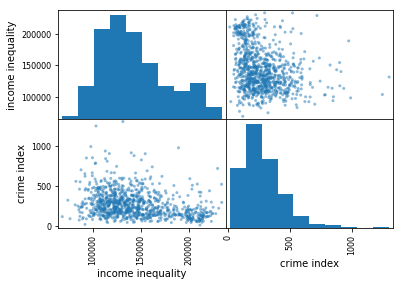

In [7]:
pd.scatter_matrix(crime_income_df[['income inequality','crime index']])

f1 = plt.gcf()

In [8]:
df_crimecount = crime_income_df[['income inequality', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries',
                            'thefts', 'autothefts', 'arson', 'crime index']]
df_crimecount

,income inequality,murders,rapes,robberies,assaults,burglaries,thefts,autothefts,arson,crime index
0,143781,0.0,0.0,5.0,69.0,44.0,462.0,21.0,NaN,115.9
1,111105,0.0,7.0,7.0,8.0,145.0,413.0,90.0,NaN,200.0
2,131285,14.0,47.0,71.0,622.0,542.0,700.0,110.0,NaN,1302.8
3,182416,1.0,0.0,12.0,0.0,86.0,597.0,12.0,NaN,140.2
4,187385,4.0,17.0,30.0,166.0,156.0,1454.0,101.0,NaN,217.4
5,103397,10.0,25.0,117.0,635.0,495.0,1867.0,219.0,NaN,1247.9
6,113394,79.0,159.0,1114.0,2355.0,3146.0,8838.0,1515.0,145.0,841.0
7,116440,1.0,8.0,1.0,12.0,70.0,505.0,39.0,NaN,251.8
8,179045,0.0,1.0,9.0,24.0,74.0,464.0,18.0,NaN,125.5
9,137442,9.0,20.0,53.0,117.0,431.0,1680.0,173.0,NaN,335.7


In [9]:
df_crimeper100 = crime_income_df[['income inequality', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
df_crimeper100

,income inequality,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
0,143781,0.0,0.0,15.0,207.5,132.3,1389.3,63.2,NaN,115.9
1,111105,0.0,32.4,32.4,37.1,671.7,1913.1,416.9,NaN,200.0
2,131285,63.8,214.1,323.4,2833.1,2468.7,3188.3,501.0,NaN,1302.8
3,182416,3.8,0.0,46.1,0.0,330.7,2295.8,46.1,NaN,140.2
4,187385,6.2,26.2,46.3,256.1,240.6,2242.8,155.8,NaN,217.4
5,103397,37.9,94.8,443.9,2409.0,1877.8,7082.7,830.8,NaN,1247.9
6,113394,37.2,74.9,524.8,1109.3,1481.9,4163.2,713.6,68.3,841.0
7,116440,6.4,51.2,6.4,76.9,448.3,3234.5,249.8,NaN,251.8
8,179045,0.0,3.7,33.7,90.0,277.5,1739.8,67.5,NaN,125.5
9,137442,16.4,36.4,96.4,212.9,784.2,3056.9,314.8,NaN,335.7


In [10]:
corrs_crimecount = df_crimecount.corr()
corrs_crimecount

,income inequality,murders,rapes,robberies,assaults,burglaries,thefts,autothefts,arson,crime index
income inequality,1.000000,0.082874,0.146293,0.131827,0.105452,0.130841,0.192376,0.163239,0.083491,-0.276809
murders,0.082874,1.000000,0.862368,0.936754,0.919617,0.833576,0.833418,0.841418,0.815199,0.283830
rapes,0.146293,0.862368,1.000000,0.889155,0.895275,0.929920,0.940481,0.916935,0.809375,0.297544
robberies,0.131827,0.936754,0.889155,1.000000,0.936240,0.882402,0.906019,0.886478,0.805558,0.249056
assaults,0.105452,0.919617,0.895275,0.936240,1.000000,0.922824,0.902541,0.905438,0.875458,0.332169
burglaries,0.130841,0.833576,0.929920,0.882402,0.922824,1.000000,0.950431,0.931868,0.866981,0.356247
thefts,0.192376,0.833418,0.940481,0.906019,0.902541,0.950431,1.000000,0.919373,0.789279,0.296065
autothefts,0.163239,0.841418,0.916935,0.886478,0.905438,0.931868,0.919373,1.000000,0.893262,0.305074
arson,0.083491,0.815199,0.809375,0.805558,0.875458,0.866981,0.789279,0.893262,1.000000,0.342006
crime index,-0.276809,0.283830,0.297544,0.249056,0.332169,0.356247,0.296065,0.305074,0.342006,1.000000


In [11]:
corrs_crimeper100 = df_crimeper100.corr()
corrs_crimeper100

,income inequality,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
income inequality,1.000000,-0.190255,-0.266208,-0.057304,-0.242623,-0.282534,-0.190840,-0.060366,-0.200756,-0.276809
murdersper100k,-0.190255,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.266208,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
robberiesper100k,-0.057304,0.606552,0.269519,1.000000,0.573215,0.518289,0.460329,0.564758,0.377354,0.762285
assaultsper100k,-0.242623,0.571986,0.378451,0.573215,1.000000,0.544664,0.438096,0.334505,0.342515,0.830321
burglariesper100k,-0.282534,0.505855,0.278477,0.518289,0.544664,1.000000,0.563583,0.464945,0.397116,0.776285
theftsper100k,-0.190840,0.315939,0.278684,0.460329,0.438096,0.563583,1.000000,0.456257,0.288854,0.746923
autotheftsper100k,-0.060366,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.200756,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.276809,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


When comparing income inequality to counts of different crimes, there appears to be extremely low but positive correlation. However, when we compare income inequality to the number of different crimes per 100k in the population, we see instead negative correlation that is still pretty low, but stronger than the positive correlation against counts of crime for the most part. In fact, if we compare income inequality to crime index, we get a negative correlation at -0.276809. This negative correlation is different from what we had originally imagined -- that income inequality and crime index had a positive association.

We will now check crime index against different percentiles (specifically 20th, Median, and 95th) of income instead of against income inequality.

In [12]:
df_crimes20th = crime_income_df[['20th', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries',
                            'thefts', 'autothefts', 'arson', 'crime index']]
corrs_crime20th = df_crimes20th.corr()
corrs_crime20th

,20th,murders,rapes,robberies,assaults,burglaries,thefts,autothefts,arson,crime index
20th,1.000000,-0.111883,-0.091294,-0.082975,-0.118754,-0.121516,-0.081830,-0.076700,-0.111423,-0.514839
murders,-0.111883,1.000000,0.862368,0.936754,0.919617,0.833576,0.833418,0.841418,0.815199,0.283830
rapes,-0.091294,0.862368,1.000000,0.889155,0.895275,0.929920,0.940481,0.916935,0.809375,0.297544
robberies,-0.082975,0.936754,0.889155,1.000000,0.936240,0.882402,0.906019,0.886478,0.805558,0.249056
assaults,-0.118754,0.919617,0.895275,0.936240,1.000000,0.922824,0.902541,0.905438,0.875458,0.332169
burglaries,-0.121516,0.833576,0.929920,0.882402,0.922824,1.000000,0.950431,0.931868,0.866981,0.356247
thefts,-0.081830,0.833418,0.940481,0.906019,0.902541,0.950431,1.000000,0.919373,0.789279,0.296065
autothefts,-0.076700,0.841418,0.916935,0.886478,0.905438,0.931868,0.919373,1.000000,0.893262,0.305074
arson,-0.111423,0.815199,0.809375,0.805558,0.875458,0.866981,0.789279,0.893262,1.000000,0.342006
crime index,-0.514839,0.283830,0.297544,0.249056,0.332169,0.356247,0.296065,0.305074,0.342006,1.000000


There is low negative correlation between 20th percentile income and counts of different crimes, but there is a substatially negative correlation of -0.514839 between the 20th percentile of income against crime index.

In [13]:
df_20thper100 = crime_income_df[['20th', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_20thper100 = df_20thper100.corr()
corrs_20thper100

,20th,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
20th,1.000000,-0.339197,-0.331618,-0.350650,-0.416062,-0.441973,-0.407847,-0.173704,-0.294415,-0.514839
murdersper100k,-0.339197,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.331618,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
robberiesper100k,-0.350650,0.606552,0.269519,1.000000,0.573215,0.518289,0.460329,0.564758,0.377354,0.762285
assaultsper100k,-0.416062,0.571986,0.378451,0.573215,1.000000,0.544664,0.438096,0.334505,0.342515,0.830321
burglariesper100k,-0.441973,0.505855,0.278477,0.518289,0.544664,1.000000,0.563583,0.464945,0.397116,0.776285
theftsper100k,-0.407847,0.315939,0.278684,0.460329,0.438096,0.563583,1.000000,0.456257,0.288854,0.746923
autotheftsper100k,-0.173704,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.294415,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.514839,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


The negative correlation between the 20th percentile of income against crimes per 100k is a lot stronger than simply against counts of crime. Aside from autothefts at correlation -0.173704, all the other crimes have a correlation between -0.45 and -0.29 with income's 20th percentile.

In [14]:
df_crimesMed = crime_income_df[['Median', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries',
                            'thefts', 'autothefts', 'arson', 'crime index']]
corrs_crimeMed = df_crimesMed.corr()
corrs_crimeMed

,Median,murders,rapes,robberies,assaults,burglaries,thefts,autothefts,arson,crime index
Median,1.000000,-0.087130,-0.061656,-0.054654,-0.090005,-0.090037,-0.044349,-0.045329,-0.085001,-0.512659
murders,-0.087130,1.000000,0.862368,0.936754,0.919617,0.833576,0.833418,0.841418,0.815199,0.283830
rapes,-0.061656,0.862368,1.000000,0.889155,0.895275,0.929920,0.940481,0.916935,0.809375,0.297544
robberies,-0.054654,0.936754,0.889155,1.000000,0.936240,0.882402,0.906019,0.886478,0.805558,0.249056
assaults,-0.090005,0.919617,0.895275,0.936240,1.000000,0.922824,0.902541,0.905438,0.875458,0.332169
burglaries,-0.090037,0.833576,0.929920,0.882402,0.922824,1.000000,0.950431,0.931868,0.866981,0.356247
thefts,-0.044349,0.833418,0.940481,0.906019,0.902541,0.950431,1.000000,0.919373,0.789279,0.296065
autothefts,-0.045329,0.841418,0.916935,0.886478,0.905438,0.931868,0.919373,1.000000,0.893262,0.305074
arson,-0.085001,0.815199,0.809375,0.805558,0.875458,0.866981,0.789279,0.893262,1.000000,0.342006
crime index,-0.512659,0.283830,0.297544,0.249056,0.332169,0.356247,0.296065,0.305074,0.342006,1.000000


In [15]:
df_Medper100 = crime_income_df[['Median', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_Medper100 = df_Medper100.corr()
corrs_Medper100

,Median,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
Median,1.000000,-0.336887,-0.342925,-0.316938,-0.412161,-0.452121,-0.408438,-0.177613,-0.286220,-0.512659
murdersper100k,-0.336887,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.342925,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
robberiesper100k,-0.316938,0.606552,0.269519,1.000000,0.573215,0.518289,0.460329,0.564758,0.377354,0.762285
assaultsper100k,-0.412161,0.571986,0.378451,0.573215,1.000000,0.544664,0.438096,0.334505,0.342515,0.830321
burglariesper100k,-0.452121,0.505855,0.278477,0.518289,0.544664,1.000000,0.563583,0.464945,0.397116,0.776285
theftsper100k,-0.408438,0.315939,0.278684,0.460329,0.438096,0.563583,1.000000,0.456257,0.288854,0.746923
autotheftsper100k,-0.177613,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.286220,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.512659,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


Once again, similar to what we saw for the 20th percentile, for the Median, there is a stronger negative correlation between income and crime per 100k than between income and just counts of crime. Against crime index, the negative correlation is -0.512659.

In [16]:
df_crimes95th = crime_income_df[['95th', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries',
                            'thefts', 'autothefts', 'arson', 'crime index']]
corrs_crime95th = df_crimes95th.corr()
corrs_crime95th

,95th,murders,rapes,robberies,assaults,burglaries,thefts,autothefts,arson,crime index
95th,1.000000,0.043645,0.102029,0.091760,0.061087,0.081883,0.143141,0.119729,0.043988,-0.354678
murders,0.043645,1.000000,0.862368,0.936754,0.919617,0.833576,0.833418,0.841418,0.815199,0.283830
rapes,0.102029,0.862368,1.000000,0.889155,0.895275,0.929920,0.940481,0.916935,0.809375,0.297544
robberies,0.091760,0.936754,0.889155,1.000000,0.936240,0.882402,0.906019,0.886478,0.805558,0.249056
assaults,0.061087,0.919617,0.895275,0.936240,1.000000,0.922824,0.902541,0.905438,0.875458,0.332169
burglaries,0.081883,0.833576,0.929920,0.882402,0.922824,1.000000,0.950431,0.931868,0.866981,0.356247
thefts,0.143141,0.833418,0.940481,0.906019,0.902541,0.950431,1.000000,0.919373,0.789279,0.296065
autothefts,0.119729,0.841418,0.916935,0.886478,0.905438,0.931868,0.919373,1.000000,0.893262,0.305074
arson,0.043988,0.815199,0.809375,0.805558,0.875458,0.866981,0.789279,0.893262,1.000000,0.342006
crime index,-0.354678,0.283830,0.297544,0.249056,0.332169,0.356247,0.296065,0.305074,0.342006,1.000000


In [17]:
df_95thper100 = crime_income_df[['95th', 'murdersper100k', 'rapesper100k', 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 'autotheftsper100k', 'arsonper100k', 'crime index']]
corrs_95thper100 = df_95thper100.corr()
corrs_95thper100

,95th,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
95th,1.000000,-0.240329,-0.302745,-0.130805,-0.302601,-0.342421,-0.257003,-0.091805,-0.238494,-0.354678
murdersper100k,-0.240329,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.302745,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
robberiesper100k,-0.130805,0.606552,0.269519,1.000000,0.573215,0.518289,0.460329,0.564758,0.377354,0.762285
assaultsper100k,-0.302601,0.571986,0.378451,0.573215,1.000000,0.544664,0.438096,0.334505,0.342515,0.830321
burglariesper100k,-0.342421,0.505855,0.278477,0.518289,0.544664,1.000000,0.563583,0.464945,0.397116,0.776285
theftsper100k,-0.257003,0.315939,0.278684,0.460329,0.438096,0.563583,1.000000,0.456257,0.288854,0.746923
autotheftsper100k,-0.091805,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.238494,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.354678,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


We see something different at the 95th percentile of income. When checking against counts of crime, there seems to be a positive correlation, although low, with rapes (0.102029), thefts (0.143141), and autothefts (0.119729) at a stronger correlation with the 95th than other crimes are.

Correlation is negative once again though when we check income's 95th percentile against the crimes per 100k in the population. Against the crime index, we have a correlation of -0.354678.

In [18]:
# Create 'ineq_exists' column: '1' if exists, '0' if doesn't
# Income inequality defined as >= median of all income inequalities
income_ineq_median = crime_income_df["income inequality"].median()

ineq_exists = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    if crime_income_df["income inequality"][i] >= income_ineq_median:
        ineq_exists[i] = 1
    else:
        ineq_exists[i] = 0
crime_income_df['inequality exists'] = ineq_exists  
crime_income_df

,city,state,20th,40th,Median,60th,80th,95th,murders,murdersper100k,...,burglariesper100k,thefts,theftsper100k,autothefts,autotheftsper100k,arson,arsonper100k,crime index,income inequality,inequality exists
0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359,0.0,0.0,...,132.3,462.0,1389.3,21.0,63.2,NaN,NaN,115.9,143781,1
1,Albertville,Alabama,17270,27280,32042,43119,73798,128375,0.0,0.0,...,671.7,413.0,1913.1,90.0,416.9,NaN,NaN,200.0,111105,0
2,Anniston,Alabama,12553,22337,30539,39541,65472,143838,14.0,63.8,...,2468.7,700.0,3188.3,110.0,501.0,NaN,NaN,1302.8,131285,0
3,Athens,Alabama,16777,33804,45920,57566,104817,199193,1.0,3.8,...,330.7,597.0,2295.8,12.0,46.1,NaN,NaN,140.2,182416,1
4,Auburn,Alabama,10718,26433,38912,53137,106853,198103,4.0,6.2,...,240.6,1454.0,2242.8,101.0,155.8,NaN,NaN,217.4,187385,1
5,Bessemer,Alabama,12497,24200,30682,39724,68488,115894,10.0,37.9,...,1877.8,1867.0,7082.7,219.0,830.8,NaN,NaN,1247.9,103397,0
6,Birmingham,Alabama,12217,24676,32404,41532,68837,125611,79.0,37.2,...,1481.9,8838.0,4163.2,1515.0,713.6,145.0,68.3,841.0,113394,0
7,Cullman,Alabama,15091,33146,40129,49040,80061,131531,1.0,6.4,...,448.3,505.0,3234.5,39.0,249.8,NaN,NaN,251.8,116440,0
8,Daphne,Alabama,24224,48136,61508,76649,118944,203269,0.0,0.0,...,277.5,464.0,1739.8,18.0,67.5,NaN,NaN,125.5,179045,1
9,Decatur,Alabama,16869,32375,42602,54318,88674,154311,9.0,16.4,...,784.2,1680.0,3056.9,173.0,314.8,NaN,NaN,335.7,137442,1


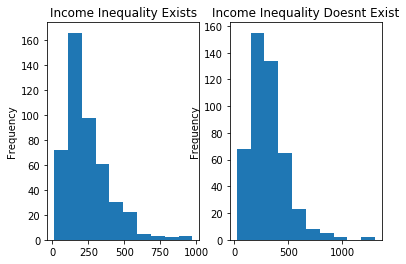

In [19]:
# Side-by-side histogram plots of crime index in areas with and without income inequality
fig, axes = plt.subplots(1, 2)

crime_income_df[crime_income_df["inequality exists"] == 1]["crime index"].plot.hist(ax = axes[0], title = 'Income Inequality Exists')
crime_income_df[crime_income_df["inequality exists"] == 0]["crime index"].plot.hist(ax = axes[1], title = 'Income Inequality Doesn''t Exist')


In [20]:
crime_ineq = crime_income_df[crime_income_df["inequality exists"] == 1]["crime index"].values
crime_no_ineq = crime_income_df[crime_income_df["inequality exists"] == 0]["crime index"].values

st_ineq, p_ineq = normaltest(crime_ineq)
st_no_ineq, p_no_ineq = normaltest(crime_no_ineq)

is_n_ineq = bool(p_ineq > 0.01)
if is_n_ineq == True:
    print('The distribution of crime index for income inequality existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is not approximately normal.')
    
is_n_no_ineq = bool(p_no_ineq > 0.01)
if is_n_no_ineq == True:
    print('The distribution of crime index for income inequality not existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality not existing is not approximately normal.')


The distribution of crime index for income inequality existing is not approximately normal.
The distribution of crime index for income inequality not existing is not approximately normal.


Although we clearly do not have approximately normal distributions, we will continue with applying the t-test on both distributions to see if there is a significant difference in crime index between the two distributions. We should be able to use the t-test despite the fact that the two distributions are not normal because of our large sample sizes -- each sample has 462 observations.

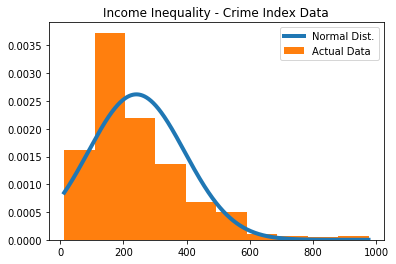

In [21]:
xs = np.arange(crime_ineq.min(), crime_ineq.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(crime_ineq), np.std(crime_ineq))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(crime_ineq, density = True, label = 'Actual Data');
plt.title('Income Inequality - Crime Index Data')
plt.legend();

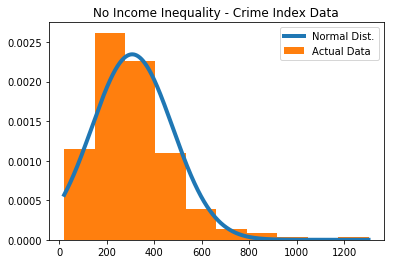

In [22]:
xs = np.arange(crime_no_ineq.min(), crime_no_ineq.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(crime_no_ineq), np.std(crime_no_ineq))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(crime_no_ineq, density = True, label = 'Actual Data');
plt.title('No Income Inequality - Crime Index Data')
plt.legend();

In [23]:
avg_crime_ineq = crime_ineq.mean()
avg_crime_no_ineq = crime_no_ineq.mean()

print('Average crime index of cities with income inequality is \t {:2.2f}'.format(avg_crime_ineq))
print('Average crime index of cities without income inequality is \t {:2.2f}'.format(avg_crime_no_ineq))

Average crime index of cities with income inequality is 	 240.87
Average crime index of cities without income inequality is 	 307.45


In [24]:
t_val, p_val = ttest_ind(crime_ineq, crime_no_ineq)

if p_val < 0.01:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')


There is a significant difference.


After performing a 2-sample t-test, we can conclude that there is indeed a significant difference in crime index between areas where income inequality exists and areas where income inequality doesn't exist.



But maybe this effect is due to the fact that the "income inequality is present" group has an objectively higher level of poverty. We could try normalizing the two data-groups with respect to how poor their poorest constituents are. So first, I will remove the outliers; if the income inequality is present group has datapoint whose 20th percentile is far richer than anything in the income inequality is not present group, then we'll remove it; likewise for a 20th percentile that is far poorer. 

One limitation that comes along with performing the analysis in this way, is that poorness and Household income level for the 20th percentile are not the same ; one city may be more expensive to live in than another. That being said, I believe that this analysis may help to tease out the effects of raw income - level. 

In [25]:

# Helper method to be used in remove_overlap(). Returns true if a datapoint is within the bounds.
def overlap_criteria(lower_bound,upper_bound,number):
    #print("shenanakwenkaal")
    #print(lower_bound,upper_bound,number)
    if ( number < lower_bound ):
        return False
    if (number > upper_bound ):
        return False
    
    return True

def kensington(x,y):
    print(x,y)
    return True

# Returns a tuple of altered dataframes.
def remove_overlap(data_set_1,data_set_2,column_name): 
    # First , identify the acceptable range. We'll star with the lower bound. 
    #The higher of the two lowerbounds will be our choice.
    
    lower_bound = data_set_1[column_name].min()

    if (data_set_2[column_name].min() > lower_bound):
        lower_bound = data_set_2[column_name].min()
       
    
    # Now, let's get that upperbound, using similar logic.
    upper_bound = data_set_1[column_name].max()
    if (data_set_2[column_name].max() < upper_bound):
        upper_bound = data_set_2[column_name].max()
    
    # Ok ok, let's make a copy of our input arrays, and subject them to the overlapcriteria. 
    
    ds1 = data_set_1.copy()
    ds2 = data_set_2.copy() 
    
    
    ds1 =  ds1[ds1[column_name].apply(lambda x: ( overlap_criteria(lower_bound,upper_bound,x) ) ) ]
    ds2 =  ds2[ds2[column_name].apply(lambda x: ( overlap_criteria(lower_bound,upper_bound,x) ) ) ]
   
    
    
    return(ds1,ds2)
    


In [26]:

# Arrite, let's put these to use. I'll use print statements to double check that my code isn't garbage.
# First, we need to make two different datasets.
df1 = crime_income_df.copy()
df1 = df1[df1["inequality exists"]==1]
df2 = crime_income_df.copy()
df2 = df2[df2["inequality exists"]==0]

print("Printing the len, max and min of df1")
print(len(df1))
print(df1['20th'].max())
print(df1['20th'].min())
print("Printing the len, max and min of df2")
print(len(df2))
print(df2['20th'].max())
print(df2['20th'].min())


df1,df2 = remove_overlap(df1,df2,"20th")

print("Printing the len, max and min of df1")
print(len(df1))
print(df1['20th'].max())
print(df1['20th'].min())
print("Printing the len, max and min of df2")
print(len(df2))
print(df2['20th'].max())
print(df2['20th'].min())




print("df1's mean for the 20th percentile is",df1['20th'].mean())
print("df1's mean for the 40th percentile is",df1['40th'].mean())
print("df2's mean for the 20th percentile is",df2['20th'].mean())
print("df2's mean for the 40th percentile is",df2['40th'].mean())

Printing the len, max and min of df1
462
82565
5800
Printing the len, max and min of df2
462
50975
7559
Printing the len, max and min of df1
449
50638
7605
Printing the len, max and min of df2
462
50975
7559
df1's mean for the 20th percentile is 26381.54565701559
df1's mean for the 40th percentile is 48416.96213808463
df2's mean for the 20th percentile is 18650.257575757576
df2's mean for the 40th percentile is 33648.406926406926


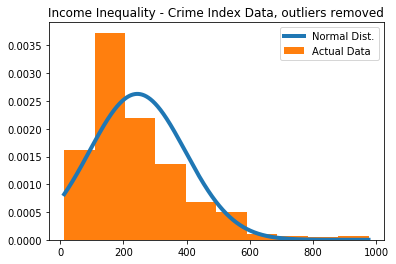

In [27]:


df1_v = df1["crime index"].values

xs = np.arange(df1_v.min(), df1_v.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(df1_v), np.std(df1_v))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(crime_ineq, density = True, label = 'Actual Data');
plt.title('Income Inequality - Crime Index Data, outliers removed')
plt.legend();


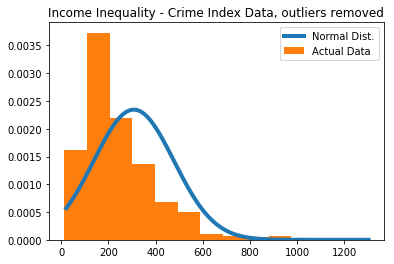

In [28]:

df2_v = df2["crime index"].values

xs = np.arange(df2_v.min(), df2_v.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(df2_v), np.std(df2_v))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(crime_ineq, density = True, label = 'Actual Data');
plt.title('Income Inequality - Crime Index Data, outliers removed')
plt.legend();



In [29]:


avg_df1 = df1_v.mean()
avg_df2 = df2_v.mean()

print('Average crime index of cities with income inequality is \t {:2.2f}'.format(avg_df1))
print('Average crime index of cities without income inequality is \t {:2.2f}'.format(avg_df2))

Average crime index of cities with income inequality is 	 243.85
Average crime index of cities without income inequality is 	 307.45


In [30]:

t_val_2, p_val_2 = ttest_ind(df1_v, df2_v)

if p_val_2 < 0.01:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')

There is a significant difference.
